In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import utils

%config InlineBackend.figure_format = 'retina'

In [18]:
input_file = pd.read_csv('../struc2vec/graph/telenor-undirected.edgelist', header=None, sep=' ', names=['from', 'to'])
#input_file = pd.read_csv('../struc2vec/graph/bitcoin-undirected.edgelist', header=0, sep=' ', names=['from', 'to'])

G = nx.from_pandas_edgelist(input_file, 'from', 'to')

In [19]:
graph = G

ids, ccs, gammas, degrees = utils.extract_graph_info(graph)
graph_df = pd.DataFrame({"Cluster Coefficient": ccs, "Gamma": gammas, "Node Degree": degrees}, index=ids)

100%|██████████| 9514/9514 [00:01<00:00, 5222.21it/s]


In [20]:
#graph_df.to_csv('gammas.csv')
#graph_df.to_csv('gammas_telenor.csv')

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
logs = np.log10(graph_df["Node Degree"].values)
scaler.fit(logs.reshape(-1, 1))

def do_transform(scaler):
    return lambda X: scaler.transform(np.log10(X))[0][0]
    

#graph_df["Node Degree"] = graph_df["Node Degree"].apply(do_transform(scaler))
#graph_df.to_csv('emb/3d/baseline_3d_projectable.csv', header=False, sep='\t', index=False)
#graph_df.to_csv('emb/3d/baseline_3d.csv', sep=' ')

Mean node degree: 0.017501320485762514
Median node degree: 0.0


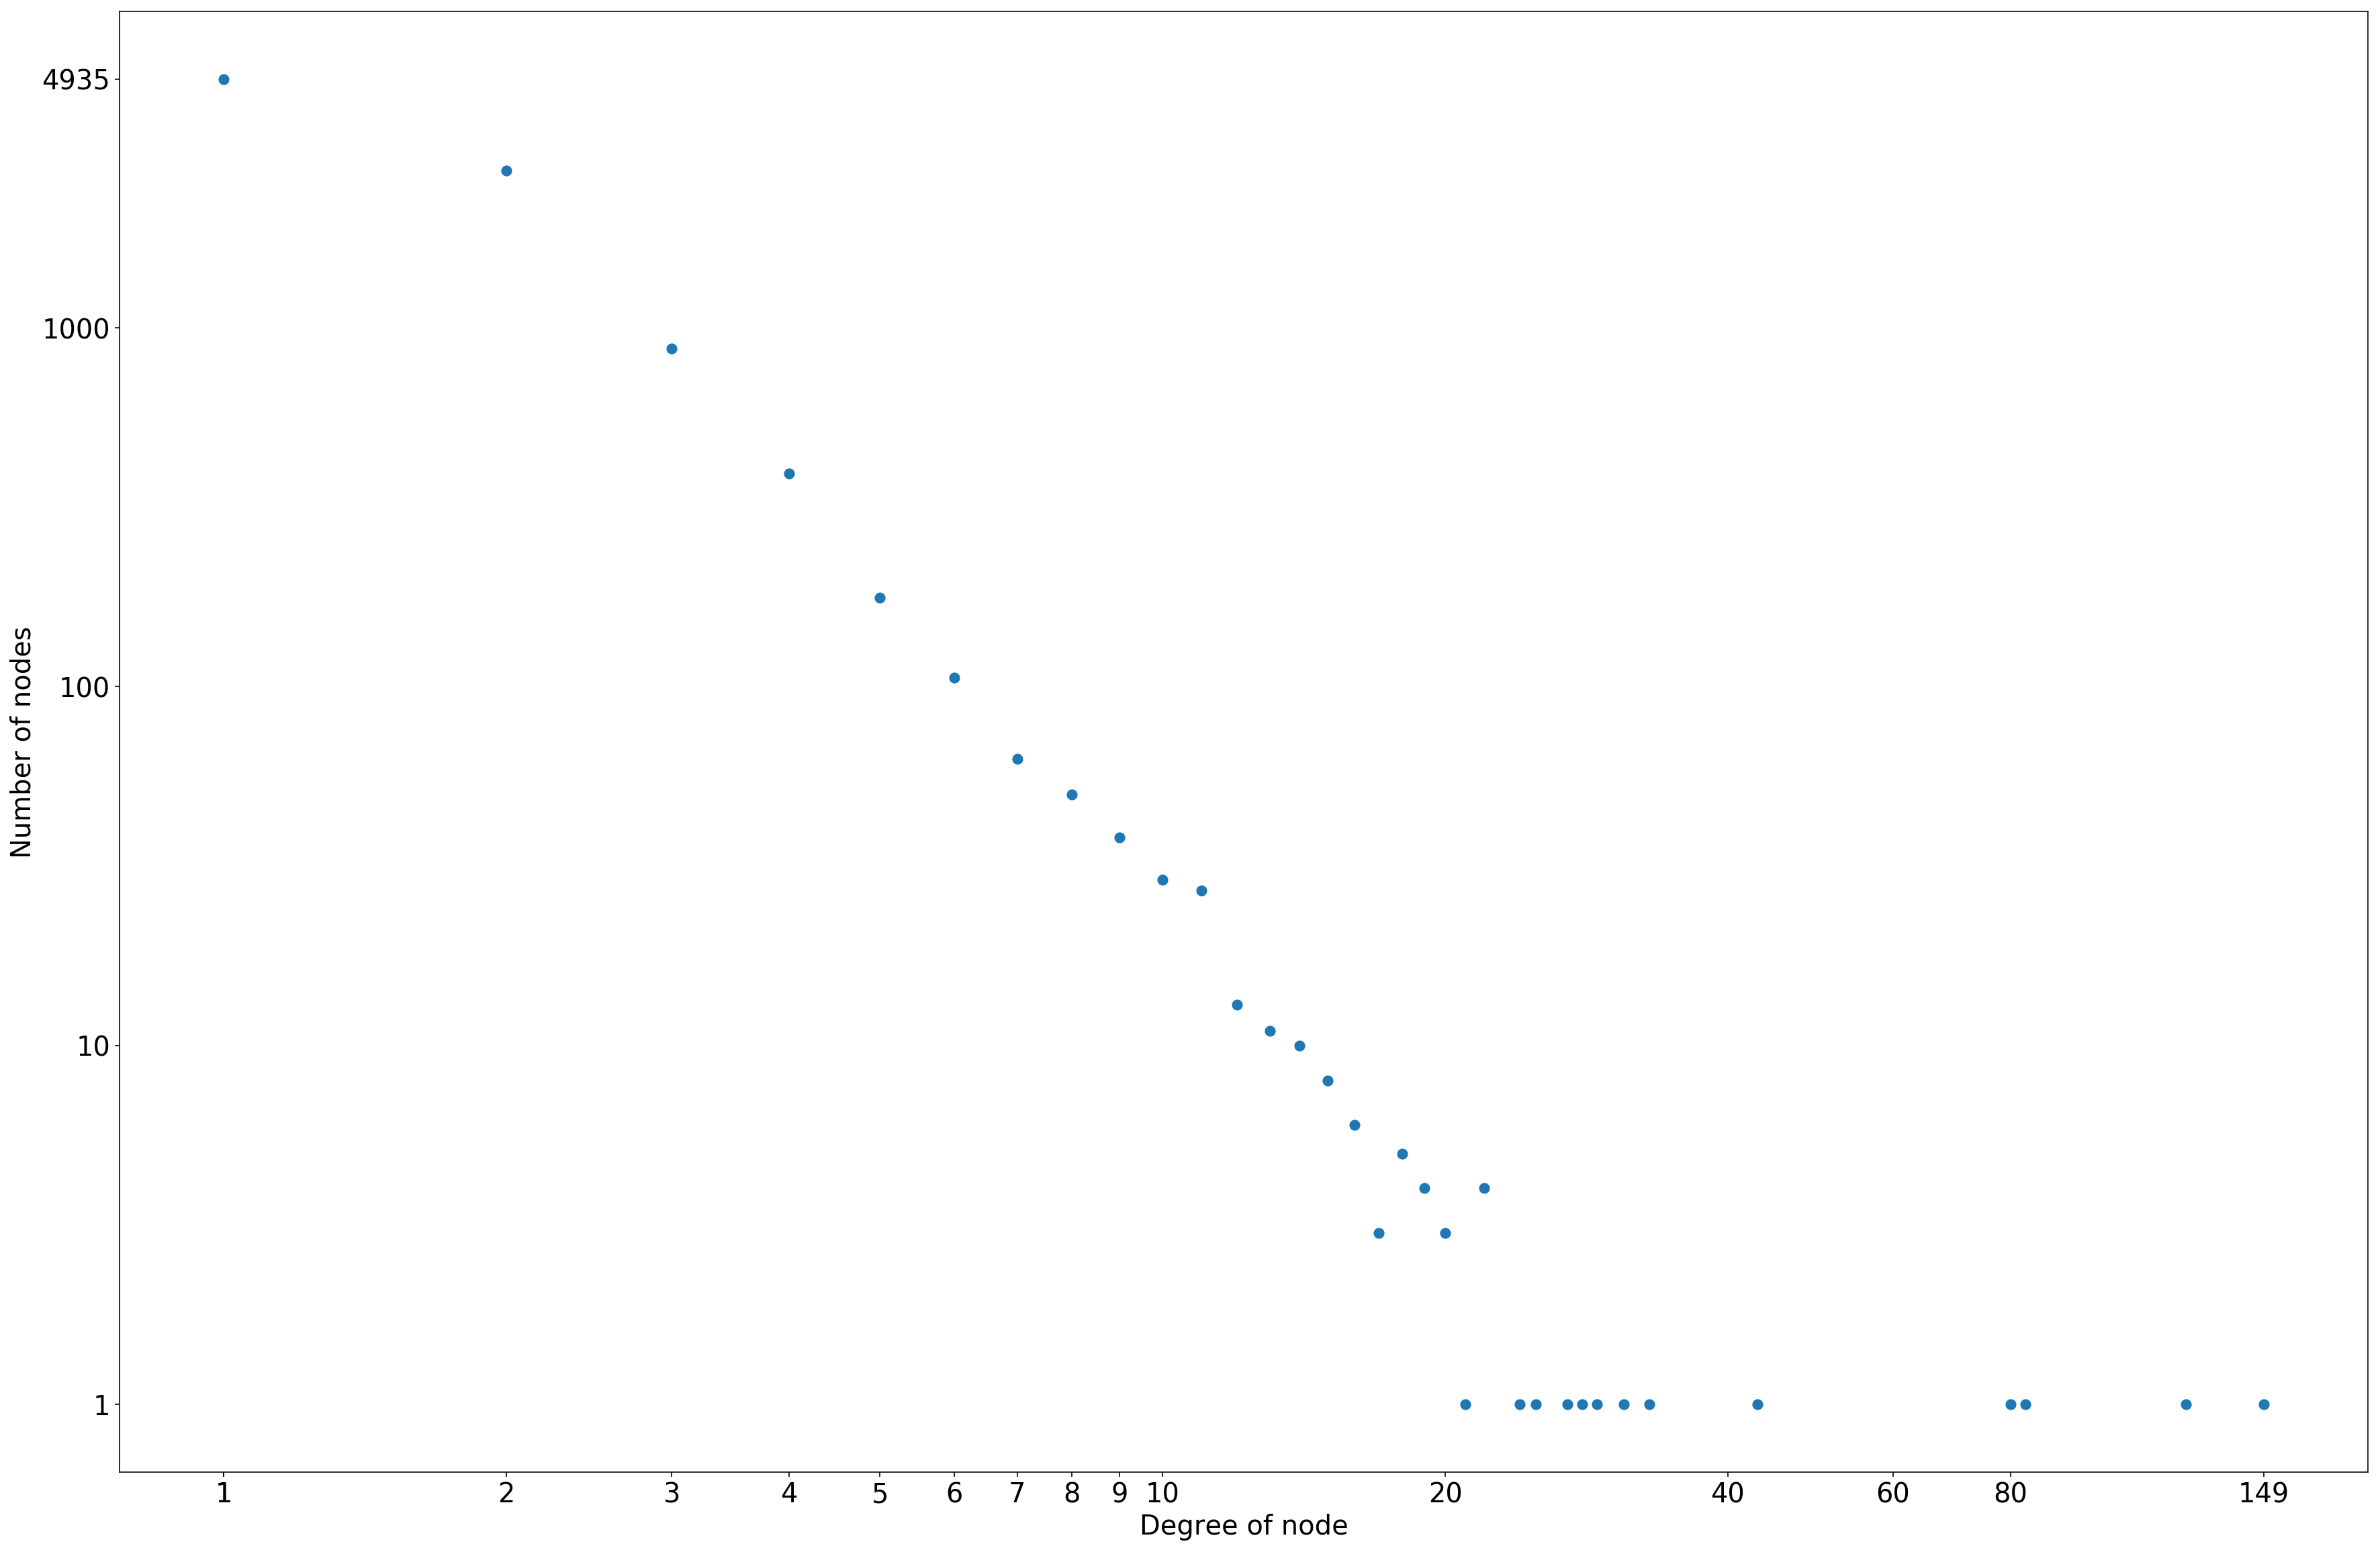

In [22]:
#Stats for node degrees
print("Mean node degree: {}".format(graph_df["Gamma"].mean()))
print("Median node degree: {}".format(graph_df["Gamma"].median()))

#print(graph_df)

degrees = graph_df.groupby("Node Degree").count()

plt.figure(figsize=(30,20))
plt.scatter(np.log10(degrees.index.values), np.log10(degrees["Gamma"]), s=50)

x_ticks = [0] + [np.log10(i) for i in range(1, 11)] + [np.log10(i) for i in range(20, 100, 20)] + [np.log10(i) for i in range(200, degrees.index.max(), 200)] + [np.log10(degrees.index.max())]
y_ticks = [0, 1, 2, 3, np.log10(degrees["Gamma"].max())]

plt.xticks(x_ticks, list(map(lambda tick: int(round(10**tick, 0)), x_ticks)))
plt.yticks(y_ticks, list(map(lambda tick: int(round(10**tick, 0)), y_ticks)))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)

plt.xlabel("Degree of node", fontsize=20)
plt.ylabel("Number of nodes", fontsize=20)
plt.savefig("img/degree_distribution_telenor.png", bbox_inches='tight')

In [74]:
print(graph_df.shape)

(9514, 3)


In [75]:
print("Percentage of nodes that have fewer than 10 neighbors: {}".format(graph_df[graph_df['Node Degree'] <= 10].shape[0] / graph_df.shape[0]))
print("Percentage of nodes that have fewer between 11 and 100 neighbors: {}".format(graph_df[(graph_df['Node Degree'] > 10) & (graph_df['Node Degree'] <= 100)].shape[0] / graph_df.shape[0]))
print("Percentage of nodes that have more than 100 neighbors: {}".format(graph_df[graph_df['Node Degree'] > 100].shape[0] / graph_df.shape[0]))

Percentage of nodes that have fewer than 10 neighbors: 0.9887534160184991
Percentage of nodes that have fewer between 11 and 100 neighbors: 0.011036367458482237
Percentage of nodes that have more than 100 neighbors: 0.00021021652301870928
